In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [3]:
df = joblib.load(r"C:\Users\JOSUE\Downloads\Preprocessing_BMW\Bmw_Preprocessing\Data\limpio2.joblib")


A continuación, describiré los pasos que seguiremos:

Dividir el conjunto de datos en características y objetivo:

Dividir los datos en conjuntos de entrenamiento y prueba.

Escalar nuestros conjuntos de datos:

Aplicar PCA a los datos de entrenamiento:

Utilizar el Análisis de Componentes Principales en los datos de entrenamiento para reducir la dimensionalidad.

Calcular la varianza explicada:

Determinar la proporción de varianza explicada por cada componente principal.
Calcular la cantidad perdida:

Evaluar cuánta información se pierde al reducir la dimensionalidad.
Varianza acumulativa explicada:

Visualizar cómo la varianza se acumula a medida que se consideran más componentes principales.
Entrenar el modelo:

Utilizar los datos de entrenamiento reducidos por PCA para entrenar nuestro modelo.

Realizar predicciones en los conjuntos de entrenamiento y prueba:

Evaluar el rendimiento del modelo tanto en el conjunto de entrenamiento como en el conjunto de prueba.

Calcular métricas:

Determinar métricas de evaluación, como la precisión o el error cuadrático medio.

Gráfico de barras para visualizar la varianza explicada:


gráfico de barras para mostrar cómo afecta la máxima varianza en los componentes principales.

Estos pasos nos ayudarán a comprender cómo la reducción de dimensionalidad mediante PCA puede influir en la capacidad de nuestro modelo para generalizar y hacer predicciones precisas.

In [4]:
#borrar variable explicativa
del df['precio']

In [5]:
#split data features y target
X = df.drop(columns=['precio_log10'])
y = df['precio_log10']

In [7]:
#split data en train a test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# scalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

APLICAMOS PCA Y REDUCIMOS A COMPONENTES DESEADOS

In [9]:
from sklearn.decomposition import PCA
n_components = 5  # componentes
pca = PCA(n_components=n_components)

Aplico PCA a los datos de entrenamiento

In [10]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Calcula la varianza explicada por cada componente

In [11]:
explained_variance =pca.explained_variance_ratio_
explained_variance

array([0.08156327, 0.06387833, 0.05941465, 0.05519289, 0.04194807])

Calculamos la cantidad de informacion perdida

In [12]:
information_lost = 1 - np.sum(explained_variance)

In [13]:
print(f'Información perdida al reducir a {n_components} componentes: {information_lost:.2%}')


Información perdida al reducir a 5 componentes: 69.80%


Cumulative_explained_variance es para visualizar cuanta varianza en los datos explicada

In [14]:
cumulative_explained_variance = np.cumsum(explained_variance)

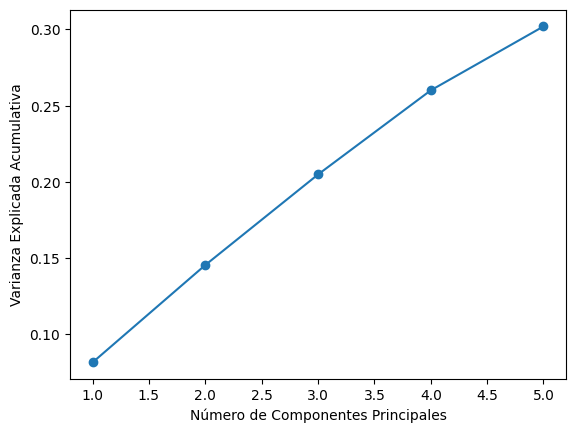

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()

ENTRENAR MODELO

In [16]:
model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

Predict

In [17]:
y_train_pre = model.predict(X_train_pca)
y_test_pre =model.predict(X_test_pca)

Metricas Evalua el modelo

In [18]:
# Calcula métricas de evaluación
mse_train = mean_squared_error(y_train, y_train_pre)
mse_test = mean_squared_error(y_test, y_test_pre)
r2 = r2_score(y_test, y_test_pre)
mae = mean_absolute_error(y_test, y_test_pre)

print(f'MSE en conjunto de entrenamiento: {mse_train:.2f}')
print(f'MSE en conjunto de prueba: {mse_test:.2f}')
print(f'R^2: {r2:.2f}')
print(f'MAE: {mae:.2f}')

MSE en conjunto de entrenamiento: 0.01
MSE en conjunto de prueba: 0.01
R^2: 0.78
MAE: 0.07
